## Web Scrapping y análisis de texto con Python

El objetivo de este cuaderno de jupyter es realizar una extrácción de datos desde una página web por medio de **WebScrapping** usando los paquetes requests y lxml. 

Para esto, se procederá a extraer la información desde el sitio web https://www.biblegateway.com centrándose en la extracción del capítulo 1 de Génesis, tanto en la versión Reina-Valera 1960 y la versión en ingles de la traducción The Message. Luego de eso, se realizará la extrácción del libro completo.

Finalmente, se realizará una limpieza de datos, eliminando los stopwords, y signos de puntuación para luego generar una nube de palabra para conocer las palabras de mayor uso.

### Extracción de datos

A continuación procederemos a usar los paquetes request y lxml para extraer información desde el sitio web https://www.biblegateway.com. Para esto procederemos a crear una función para scrapear un capítulo de la biblia.

In [1]:
# importar módulos
import requests
import lxml.html as html

In [3]:
# Función Scraper
def fn_scrapper_biblia(pagina):
    try: 
        # Requerir página web
        obtener_pagina = requests.get(pagina)
        # En caso de respuesta positíva al requerimiento de la página
        if obtener_pagina.status_code == 200:
            # Encoding página requerida a utf-8
            obtener_pagina_utf8 = obtener_pagina.content.decode('utf-8')
            # Parsear página 
            parsear_pagina = html.fromstring(obtener_pagina_utf8)
            # Obtener XPATH de los versiculos
            xpath_versiculos = '//p/span/@class'
            parsear_xpath_versiculos = parsear_pagina.xpath(xpath_versiculos)
            # Bucle for para capturar contenido de la ruta xpath de los versículos y unirlos en una lista
            capitulo_full = ["".join(parsear_pagina.xpath('//p/span[@class="'+versiculo+'"]/text()')) for versiculo in parsear_xpath_versiculos]
            # Unir los strings en uno sólo párrafo
            capitulo_full = " ".join(capitulo_full)
            # Quitar espacios extras
            capitulo_full = ' '.join(capitulo_full.split())
            return(capitulo_full)
        else:
            raise ValueError(f'Error:{respuesta.status}')
    except ValueError as ve:
        print(ve)

### Nube de palabras

Una vez obtenida la información (texto), prodecederos a generar una función para la generación de una nube de palabra. En este caso, excluiremos las stopwords y los signos de puntuación a fin de capturar la frcuencia de palabras claves presente en nuestro análisis.

In [4]:
# !pip -q install stop-words
# Importar módulo de stopwords
# !pip -q install wordcloud 

# Importar paquetes
from punctuation import Punctuation
from stop_words import get_stop_words 
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [5]:
# Función nube de palabras
def fn_nube_palabra(texto, stop_words_idioma):

    # Remover signos de puntuación a texto a analizar
    texto = Punctuation.remove(texto)
    texto = texto.replace('“', '')

    # Obtener lista de stopwords
    stop_words =  get_stop_words(stop_words_idioma)
    
    # Iniciar objeto nube de palabras a texto sin signos de puntuación
    obj_WordCloud = WordCloud(
        background_color='black',
        max_words=2000,
        stopwords=stop_words
    ).generate(texto)

    # Desplegar nube de palabras
    fig = plt.figure()
    fig.set_figwidth(10) # set width
    fig.set_figheight(8) # set height

    plt.imshow(obj_WordCloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

### Frecuencia de palabras

A continuación realizaremos una función de nos muestre la frecuencia de las palabras utilizadas.

In [6]:
from collections import Counter

# Función frecuencia
def fn_frecuencia(texto, idioma):
    # Remover puntuación del texto extraido
    texto_sin_punct = Punctuation.remove(texto)
    texto_sin_punct = texto_sin_punct.replace('“', '')
    # Separar el texto en palabras
    texto_split = texto_sin_punct.split()
    # Eliminar stopwords
    texto_clean = [word for word in texto_split if word.lower() not in get_stop_words(idioma)]
    # Ontener frecuencia de las palabras utilizadas
    frecuencia = Counter(texto_clean)
    # Ordenar de mayor a menor frecuencia
    frecuencia = sorted(frecuencia.items(), key=lambda x:x[1], reverse=True)
    return(frecuencia)

**- Análisis Génesis 1, Revisión Reina Valera 1960.**

Ahora bien, procederemos a desplegar las funciones creadas usando para esto el capítulo 1 del libro del génesis de la revisón Reina Valera 1960.

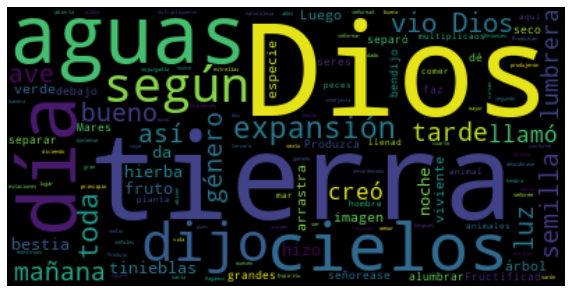

In [7]:
# Scrapper Génesis 1 RVR-60
url = 'https://www.biblegateway.com/passage/?search=G%C3%A9nesis+1&version=RVR1960'

# Extraer texto por medio de scrapping
genesis1_rv = fn_scrapper_biblia(url)

# Generar Nube palabra
fn_nube_palabra(genesis1_rv, 'es')

A continuación aplicaremos la función para obtener la frecuencia de las palabras.

In [8]:
fn_frecuencia(genesis1_rv, 'es')

[('Dios', 31),
 ('tierra', 20),
 ('aguas', 11),
 ('según', 10),
 ('cielos', 9),
 ('día', 9),
 ('expansión', 9),
 ('dijo', 7),
 ('vio', 7),
 ('luz', 6),
 ('tarde', 6),
 ('mañana', 6),
 ('así', 6),
 ('bueno', 6),
 ('semilla', 6),
 ('género', 6),
 ('toda', 6),
 ('creó', 5),
 ('llamó', 5),
 ('aves', 5),
 ('tinieblas', 4),
 ('hizo', 4),
 ('hierba', 4),
 ('fruto', 4),
 ('da', 4),
 ('Dijo', 3),
 ('verde', 3),
 ('árbol', 3),
 ('lumbreras', 3),
 ('noche', 3),
 ('especie', 3),
 ('bestias', 3),
 ('arrastra', 3),
 ('imagen', 3),
 ('faz', 2),
 ('separó', 2),
 ('Luego', 2),
 ('debajo', 2),
 ('seco', 2),
 ('Produzca', 2),
 ('dé', 2),
 ('separar', 2),
 ('alumbrar', 2),
 ('grandes', 2),
 ('lumbrera', 2),
 ('señorease', 2),
 ('seres', 2),
 ('vivientes', 2),
 ('bendijo', 2),
 ('Fructificad', 2),
 ('multiplicaos', 2),
 ('llenad', 2),
 ('animales', 2),
 ('animal', 2),
 ('hombre', 2),
 ('peces', 2),
 ('mar', 2),
 ('todas', 2),
 ('aquí', 2),
 ('planta', 2),
 ('comer', 2),
 ('principio', 1),
 ('desordenada', 

**- Análisis Génesis 1, Traducción The Message**

Ahora bien, procederemos a desplegar las funciones creadas usando para esto el capítulo 1 del libro del génesis de la Traducción The Message.

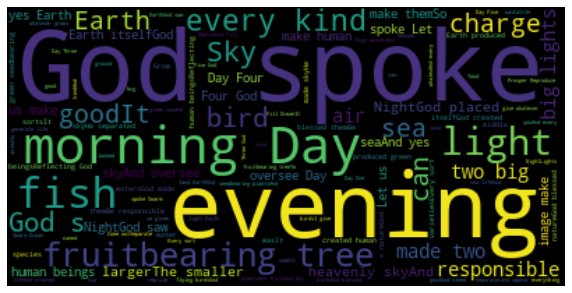

In [9]:
# Scrapper Génesis 1 The Message
url= 'https://www.biblegateway.com/passage/?search=Genesis+1&version=MSG'

# Extraer texto por medio de scrapping
genesis1_msg = fn_scrapper_biblia(url)

# Generar Nube palabra
fn_nube_palabra(genesis1_msg, 'en')

Al igual que para la revisión RVR-60 procederemos a realizar una visualziación de las palabras con mayor frecuencia.

In [10]:
fn_frecuencia(genesis1_msg, 'en')

[('God', 55),
 ('spoke', 40),
 ('evening', 33),
 ('morning—Day', 33),
 ('fish', 20),
 ('Earth', 17),
 ('saw', 16),
 ('fruitbearing', 16),
 ('created', 14),
 ('NightGod', 14),
 ('make', 14),
 ('human', 14),
 ('responsible', 14),
 ('light', 13),
 ('made', 13),
 ('skyAnd', 13),
 ('sea', 13),
 ('every', 13),
 ('blessed', 13),
 ('green', 12),
 ('sort', 12),
 ('Day', 10),
 ('kind', 10),
 ('named', 9),
 ('God’s', 8),
 ('give', 7),
 ('two', 7),
 ('big', 7),
 ('lights', 7),
 ('largerThe', 7),
 ('smaller', 7),
 ('charge', 7),
 ('placed', 7),
 ('heavenly', 7),
 ('oversee', 7),
 ('goodIt', 7),
 ('Four', 7),
 ('Let', 7),
 ('us', 7),
 ('beings', 7),
 ('image', 7),
 ('themSo', 7),
 ('can', 7),
 ('seaAnd', 7),
 ('yes', 7),
 ('itselfGod', 7),
 ('beingsReflecting', 7),
 ('natureGod', 7),
 ('themBe', 7),
 ('birds', 7),
 ('air', 7),
 ('Sky', 6),
 ('middle', 6),
 ('watersGod', 6),
 ('skyHe', 6),
 ('separated', 6),
 ('water', 6),
 ('wasIt', 6),
 ('Two', 6),
 ('Grow', 6),
 ('varietiesEvery', 6),
 ('tree”Eart

**- Análisis Génesis, Revisión Reina Valera 1960**

Ahora bien, procederemos a desplegar las funciones creadas usando para esto el libro del génesis de la Traducción The Message.

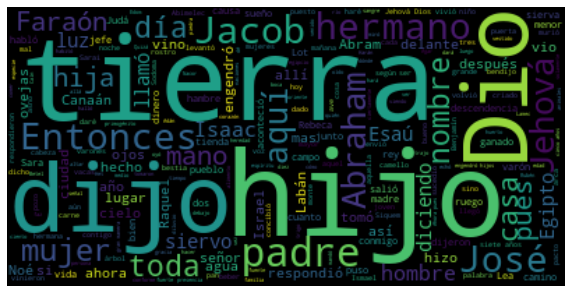

In [11]:
# Scraper Génesis RVR-60
genesis_rv = [fn_scrapper_biblia('https://www.biblegateway.com/passage/?search=G%C3%A9nesis+'+str(i)+'&version=RVR1960') for i in range(1,51)]
genesis_rv = ' '.join(genesis_rv)
fn_nube_palabra(genesis_rv, 'es')

Procederemos a realizar una visualziación de las palabras con mayor frecuencia.

In [12]:
fn_frecuencia(genesis_rv, 'es')

[('tierra', 341),
 ('dijo', 315),
 ('Dios', 244),
 ('hijos', 212),
 ('padre', 197),
 ('Jacob', 186),
 ('José', 168),
 ('Jehová', 167),
 ('hijo', 164),
 ('Entonces', 142),
 ('Abraham', 132),
 ('aquí', 129),
 ('mujer', 123),
 ('años', 114),
 ('nombre', 99),
 ('dio', 99),
 ('pues', 98),
 ('casa', 96),
 ('hermano', 93),
 ('Faraón', 93),
 ('toda', 91),
 ('Isaac', 88),
 ('hermanos', 79),
 ('respondió', 78),
 ('Egipto', 78),
 ('Esaú', 78),
 ('diciendo', 75),
 ('allí', 75),
 ('llamó', 74),
 ('luz', 71),
 ('días', 69),
 ('ahora', 68),
 ('engendró', 67),
 ('mano', 66),
 ('delante', 66),
 ('señor', 65),
 ('hizo', 61),
 ('hijas', 59),
 ('Abram', 59),
 ('lugar', 57),
 ('dos', 56),
 ('ovejas', 56),
 ('después', 56),
 ('Labán', 56),
 ('tomó', 55),
 ('siete', 55),
 ('día', 53),
 ('hombre', 53),
 ('Israel', 53),
 ('varón', 51),
 ('si', 51),
 ('Canaán', 49),
 ('ojos', 47),
 ('siervos', 47),
 ('hecho', 44),
 ('hija', 42),
 ('Raquel', 42),
 ('vio', 41),
 ('Noé', 41),
 ('ciudad', 40),
 ('así', 38),
 ('vida

Para esta traducción, en el libro del Génesis vemos que la palabra **tierra** es la más importante, luego la palabra **dijo** y **Dios**, palabras que varias veces se muestran de manera conjunta.

Otras palabras importantes son **hijos**, **padres**, **Jacob** y **José**, términos y pesonajes importantes para el relato del Génesis.

**- Análisis Génesis, Traducción The Message**

Ahora bien, procederemos a desplegar las funciones creadas usando para esto el libro del génesis de la Traducción The Message.

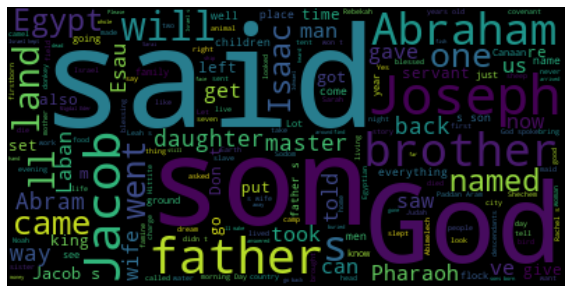

In [13]:
# Scraper Génesis The Message
genesis_msg = [fn_scrapper_biblia('https://www.biblegateway.com/passage/?search=G%C3%A9nesis+'+str(i)+'&version=MSG') for i in range(1,51)]
genesis_msg = ' '.join(genesis_msg)
fn_nube_palabra(genesis_msg, 'en')

In [14]:
fn_frecuencia(genesis_msg, 'en')

[('said', 389),
 ('God', 286),
 ('sons', 252),
 ('Joseph', 204),
 ('will', 184),
 ('Jacob', 179),
 ('son', 169),
 ('father', 165),
 ('Abraham', 134),
 ('went', 123),
 ('back', 119),
 ('Isaac', 115),
 ('years', 111),
 ('wife', 109),
 ('I’ll', 102),
 ('Israel', 102),
 ('came', 97),
 ('named', 95),
 ('land', 94),
 ('one', 90),
 ('I’m', 89),
 ('took', 86),
 ('Egypt', 84),
 ('get', 83),
 ('gave', 82),
 ('brothers', 82),
 ('way', 81),
 ('saw', 78),
 ('Abram', 78),
 ('spoke', 77),
 ('Pharaoh', 77),
 ('got', 74),
 ('Esau', 74),
 ('us', 73),
 ('man', 72),
 ('brother', 72),
 ('give', 71),
 ('told', 71),
 ('blessed', 70),
 ('going', 70),
 ('left', 70),
 ('old', 69),
 ('Jacob’s', 67),
 ('made', 66),
 ('can', 66),
 ('family', 65),
 ('two', 64),
 ('make', 64),
 ('go', 64),
 ('set', 62),
 ('children', 62),
 ('Laban', 62),
 ('time', 60),
 ('head', 57),
 ('now', 56),
 ('king', 56),
 ('put', 55),
 ('father’s', 55),
 ('ground', 54),
 ('lived', 54),
 ('Earth', 53),
 ('well', 53),
 ('men', 53),
 ('daughter

Para esta traducción, en el libro del Génesis vemos que las palabras **said** y **God** son las que más se usan dado que varias veces se muestran de manera conjunta.

Otras palabras importantes son **son** y **Joseph** mostrando la importancia de José en el relato del Génesis.